In [111]:
import matplotlib.pyplot as pl
import numpy as np
import imp
import os

path_to_config_folder = '/Users/hollowayp/paltas/paltas/Configs/Examples/'
config_filename = 'config_LSST.py'
full_path = os.path.join(path_to_config_folder, config_filename)
config_dict = imp.load_source(filename, full_path).config_dict

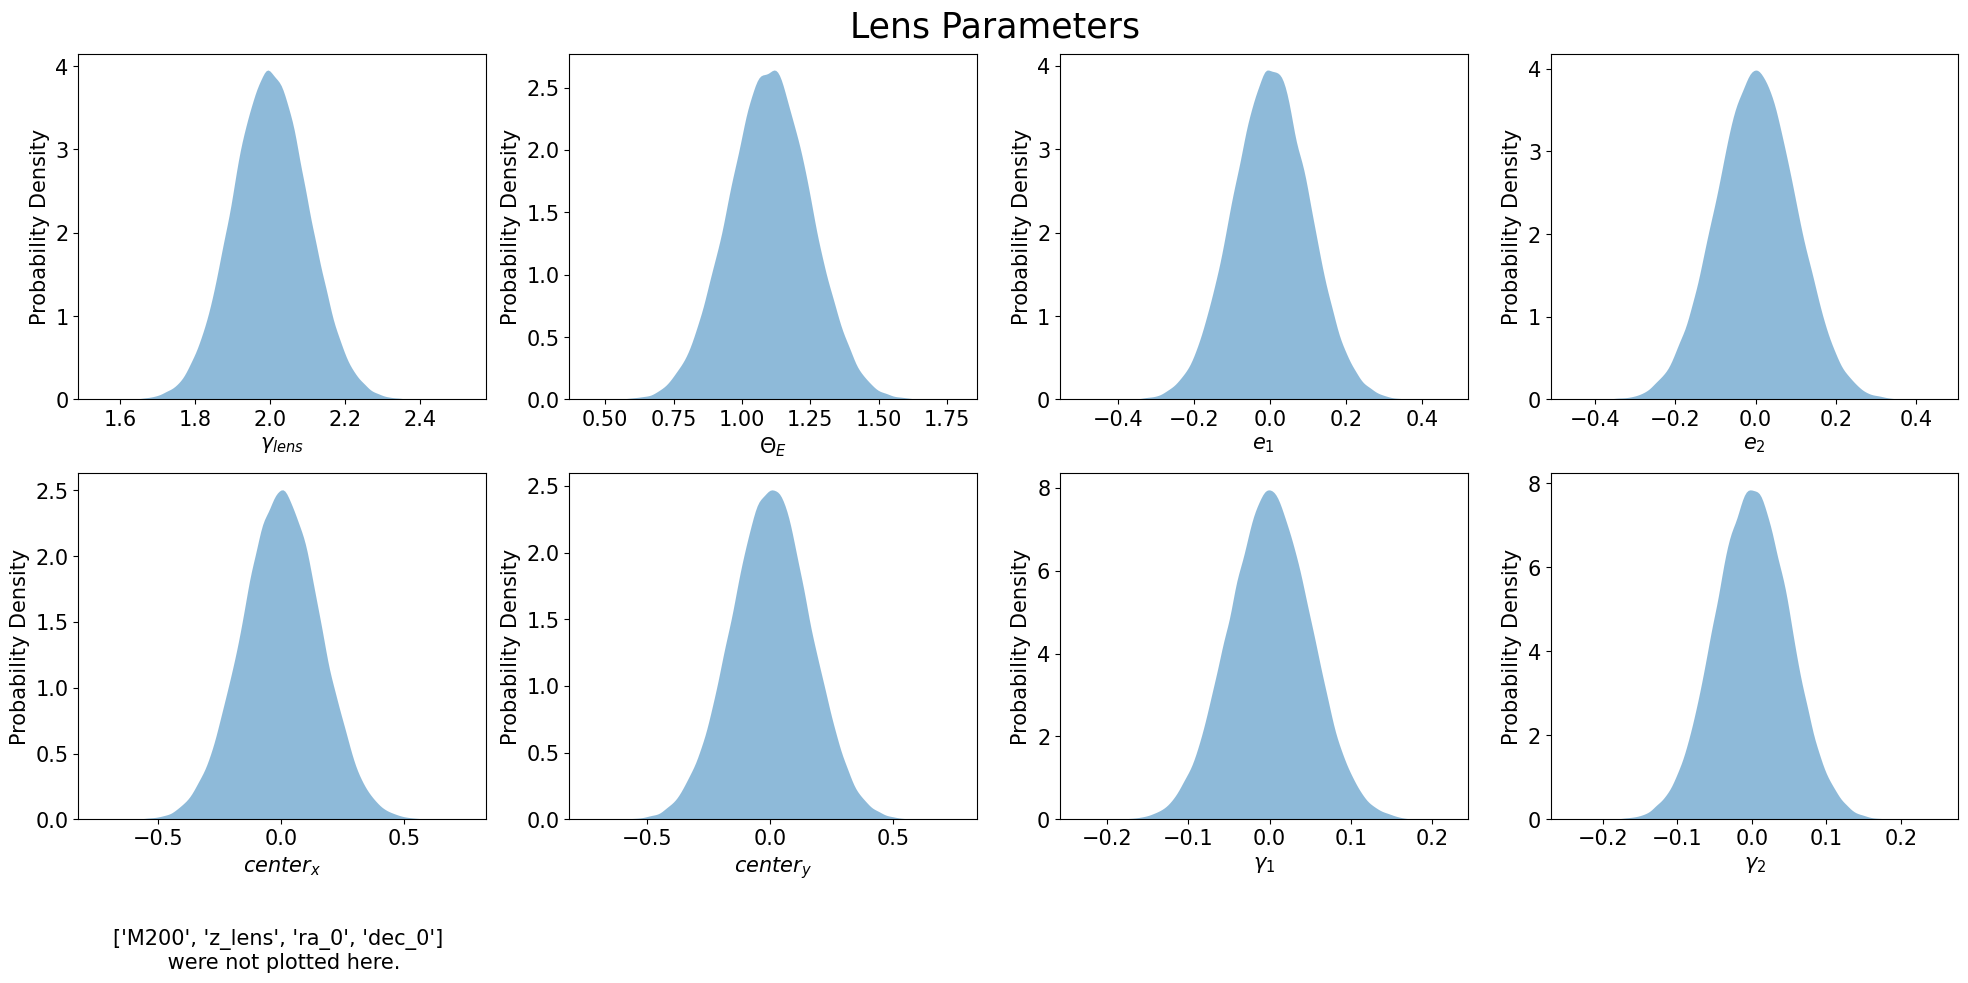

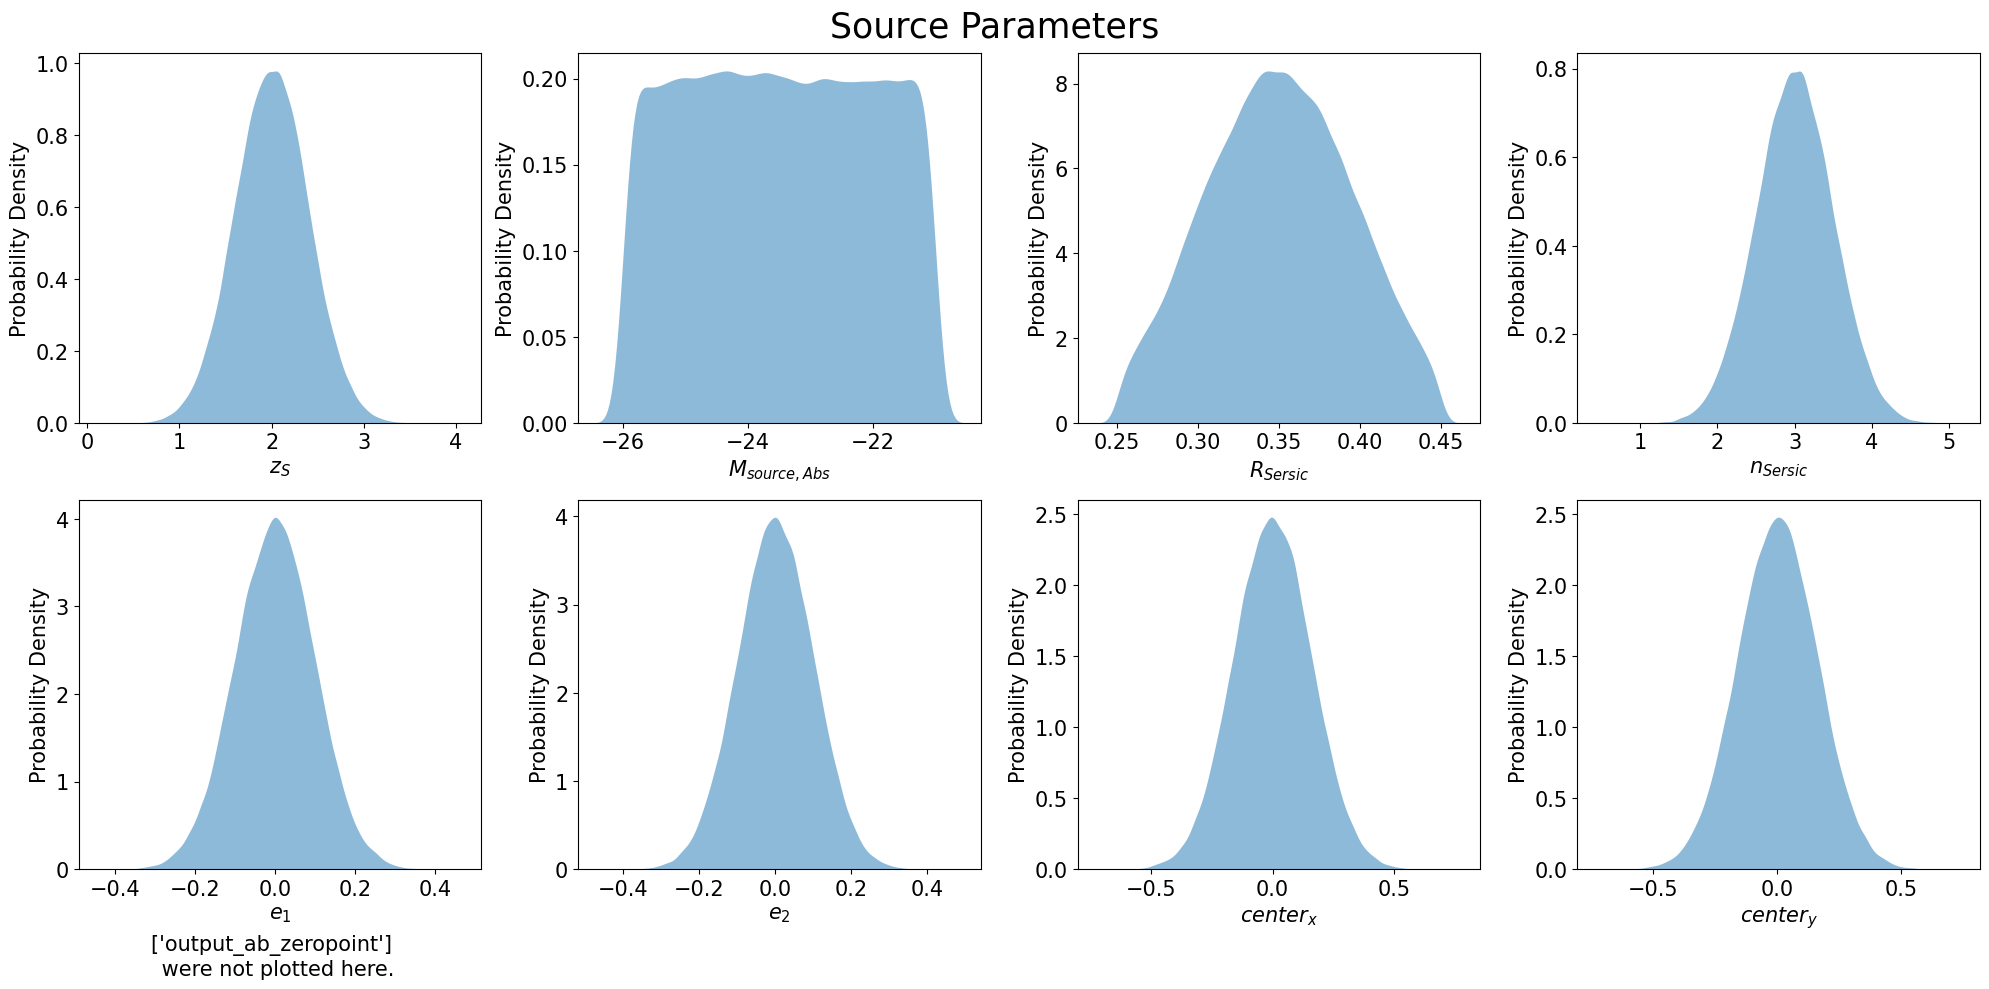

In [112]:
xlabel_dict = {'gamma':'$\gamma_{lens}$','theta_E':'$\Theta_E$',\
              'e1':'$e_1$','e2':'$e_2$',\
              'center_x':'$center_x$','center_y':'$center_y$',\
              'gamma1':'$\gamma_1$','gamma2':'$\gamma_2$',\
              'z_source':'$z_S$','magnitude':'$M_{source,Abs}$',\
              'R_sersic':'$R_{Sersic}$','n_sersic':'$n_{Sersic}$'}
title_dict = {'main_deflector':'Lens Parameters','source':'Source Parameters'}
N_cols = 4
for object_i in ['main_deflector','source']:
    fig,ax = pl.subplots(2,N_cols,figsize=(5*N_cols,10))
    config_keys = list(config_dict[object_i]['parameters'].keys())
    n_plot = 0
    params_missed=[]
    for i in range(len(config_keys)):
        N_samp = 100000
        x = int(n_plot%N_cols)
        y = int(np.floor(n_plot/N_cols))
        k_i = list(config_dict[object_i]['parameters'].keys())[i]
        try:data_i = config_dict[object_i]['parameters'][k_i](size=N_samp)
        except: params_missed.append(k_i);continue #data_i = [config_dict[object_i]['parameters'][k_i]]
        sns.kdeplot(data=data_i,fill=True,alpha=.5, linewidth=0,ax=ax[y,x])
        n_plot+=1
        ax[y,x].set_xlabel(xlabel_dict[k_i],fontsize=15)
        ax[y,x].set_ylabel('Probability Density',fontsize=15)
        ax[y,x].tick_params(labelsize=15)
    pl.suptitle(title_dict[object_i],fontsize=25)
    ax[1,0].text(0,-1,f'{params_missed} \n were not plotted here.',fontsize=15,va='center',ha='center')
    pl.tight_layout()
    pl.show()


In [1]:
!python3 -m pip install jax

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.1/348.1 kB 9.2 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
